# Загрузки

In [1]:
!python --version

Python 3.12.4


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [5]:
import numpy as np
import pandas as pd
from sklearn import metrics
from importlib import reload
import matplotlib.pyplot as plt
import DS_risk

In [6]:
# Для перезагрузки ранее импортированного модуля.
DS_risk = reload(DS_risk)
from DS_risk import World, Bank_DS, DWH_DB, Tariff, Contract, Portfolio, Model

## Инициализации

In [10]:
W = World()    # Инициализация мира

DWH = DWH_DB() # Пародия на базу данных

test(AVG) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test(0) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test(1) -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Hello World!


In [12]:
DS = Bank_DS() # Активности банка

Hello DS!


In [14]:
# Cut-off предопределенный 
print('Score = %g\nPD = %g' % (W.Fate_cutoff_score, DS.sigmoid(W.Fate_cutoff_score)))

Score = -0.847298
PD = 0.3


### Создание рисковой модели

In [17]:
model0 = DS.create_model()

In [19]:
model0.Model_Sigma = 0.7

In [21]:
model0.info()

1 0 0.7


In [23]:
s = W.get_god_score(5)

In [25]:
s

[array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]),
 [1, 1, 1, 1, 1]]

In [27]:
m = model0.Score(s[0])
m

array([1.07995783, 1.0652191 , 0.87278794, 2.16864   , 2.15497694])

### Создание тарифных планов

In [30]:
# Создадим тарифные планы
tariff_01 = Tariff('TR01')
tariff_01.info()

tariff_02 = Tariff('TR02', IR = 0.18, DUR = 36)
tariff_02.info()

Name: TR01 TypePlan = Annuity IR = 0.12 Duration = 24 MD = 11.9046
Name: TR02 TypePlan = Annuity IR = 0.18 Duration = 36 MD = 16.6512


In [32]:
tariff_01.print_plan(amount=100_000)

 N [' Долг+проц', '    Платеж', 'Плат(долг)', 'Плат(проц)', '  Кум долг', '  Кум проц', 'Кум оплаты']
01 [' 101000.00', '   4707.35', '   3707.35', '   1000.00', '   3707.35', '   1000.00', '   4707.35']
02 ['  97255.58', '   4707.35', '   3744.42', '    962.93', '   7451.77', '   1962.93', '   9414.69']
03 ['  93473.71', '   4707.35', '   3781.86', '    925.48', '  11233.63', '   2888.41', '  14122.04']
04 ['  89654.03', '   4707.35', '   3819.68', '    887.66', '  15053.32', '   3776.07', '  18829.39']
05 ['  85796.15', '   4707.35', '   3857.88', '    849.47', '  18911.20', '   4625.54', '  23536.74']
06 ['  81899.69', '   4707.35', '   3896.46', '    810.89', '  22807.66', '   5436.43', '  28244.08']
07 ['  77964.27', '   4707.35', '   3935.42', '    771.92', '  26743.08', '   6208.35', '  32951.43']
08 ['  73989.49', '   4707.35', '   3974.78', '    732.57', '  30717.86', '   6940.92', '  37658.78']
09 ['  69974.96', '   4707.35', '   4014.53', '    692.82', '  34732.38', '   7633

### Создание портфеля

In [35]:
# Создадим портфели
GP1 = Portfolio(world = W, dwh = DWH)
GP2 = Portfolio(world = W, dwh = DWH)
GP1.info()
GP2.info()

ID = 1 Возраст портеля 0 мес Кол-во контрактов 0
ID = 2 Возраст портеля 0 мес Кол-во контрактов 0


In [37]:
N_const = 1000 # Пусть будут постоянные ежемесячные выдачи 

In [39]:
# Создадим план продаж на основе созданных тарифных планов
issue_plan_gp = [(tariff_01, 100_000) for i in range(N_const//2)] + [(tariff_02, 50_000) for i in range(N_const//2)]
issue_plan_il = [(tariff_01, 30_000) for i in range(N_const//2)]
print(len(issue_plan_gp))
print(len(issue_plan_il))

1000
500


In [44]:
# фиксируем Cut_off
pd_cutoff = 0.1
score_cutoff = DS.logit(pd_cutoff)
print('%g' % score_cutoff)

-2.19722


In [46]:
for t in range(2*12):
    GP1.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model0)
    GP2.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model0)

DWH.update_dwh_dic() # обновим справочники DWH
GP1.info()
GP2.info()

ID = 1 Возраст портеля 24 мес Кол-во контрактов 24000
ID = 2 Возраст портеля 24 мес Кол-во контрактов 24000


### Обратимся к базе данных

In [49]:
LI = DWH.LI.reset_index(drop=True)
print(LI.shape)
LI.tail()

(600000, 7)


,PORTFOLIO_ID,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID
599995,2,47996,24,0,0,0,0
599996,2,47997,24,0,0,0,0
599997,2,47998,24,0,0,0,0
599998,2,47999,24,0,0,0,0
599999,2,48000,24,0,0,0,0


In [51]:
ix_bad = LI['DOD_ID']>=4
LI['BADFLAG'] = 0
LI.loc[ix_bad,'BADFLAG'] = 1

In [53]:
Contract.cntr_dic[13].duration

24

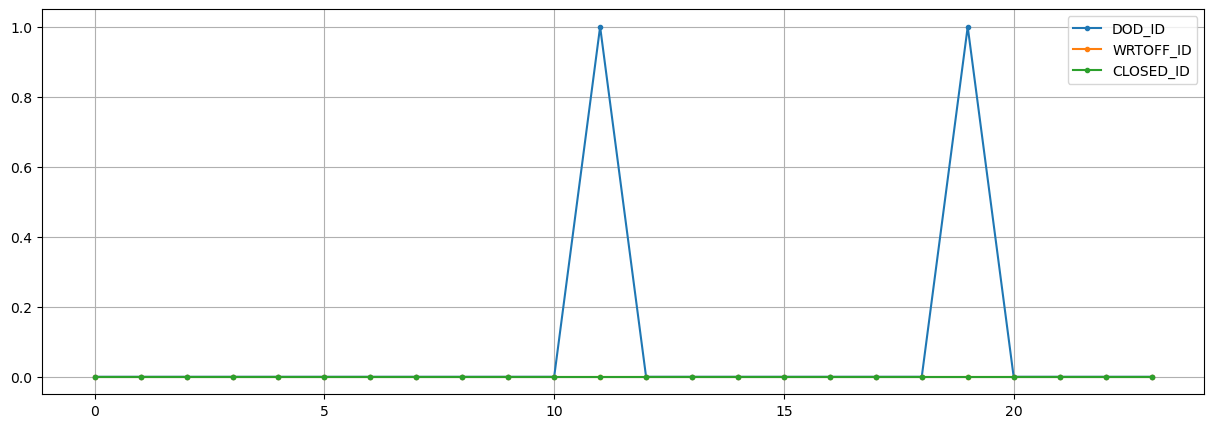

In [55]:
ix = LI['CNTR_ID']==11
plt.figure(figsize=[15,5])
plt.plot(LI[ix].set_index('MOB')[['DOD_ID', 'WRTOFF_ID', 'CLOSED_ID']], '.-')
plt.legend(['DOD_ID', 'WRTOFF_ID', 'CLOSED_ID'])
plt.grid()
plt.show()

In [57]:
DMC = DWH.DMContract
print(DMC.shape)
DMC.head(10)

(48000, 14)


,PORTFOLIO_ID,CNTR_ID,ISSUE_DT,WRTOFF_DT,CLOSED_DT,AMOUNT,DURATION,IR,TARIFF,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,NUM_IN_QUEUE
0,1,1,1,0,0,100000,24,0.12,TR01,-2.219567,-2.060141,0,1,11
1,1,2,1,0,0,100000,24,0.12,TR01,-3.254088,-2.434838,0,1,140
2,1,3,1,0,0,100000,24,0.12,TR01,-2.401875,-1.627438,0,1,44
3,1,4,1,0,0,100000,24,0.12,TR01,-2.355590,-2.793085,0,1,57
4,1,5,1,0,0,100000,24,0.12,TR01,-2.642712,-1.044589,0,1,3
5,1,6,1,0,0,100000,24,0.12,TR01,-2.786514,-2.114164,0,1,84
6,1,7,1,0,0,100000,24,0.12,TR01,-3.124761,-1.943323,0,1,23
7,1,8,1,0,0,100000,24,0.12,TR01,-2.747886,-2.782534,0,1,5
8,1,9,1,0,0,100000,24,0.12,TR01,-2.275592,0.021863,1,1,3
9,1,10,1,0,0,100000,24,0.12,TR01,-2.266085,-1.306534,0,1,30


In [59]:
DMC.tail(10)

,PORTFOLIO_ID,CNTR_ID,ISSUE_DT,WRTOFF_DT,CLOSED_DT,AMOUNT,DURATION,IR,TARIFF,MODEL_SCORE,FATED_SCORE,FATED_RESULT,MODEL_ID,NUM_IN_QUEUE
47990,2,47991,24,0,0,50000,36,0.18,TR02,-2.564905,-2.895083,0,1,4
47991,2,47992,24,0,0,50000,36,0.18,TR02,-2.482308,-1.803461,0,1,58
47992,2,47993,24,0,0,50000,36,0.18,TR02,-2.379761,-1.195871,0,1,18
47993,2,47994,24,0,0,50000,36,0.18,TR02,-2.321104,-0.455031,1,1,17
47994,2,47995,24,0,0,50000,36,0.18,TR02,-2.772403,-2.004192,0,1,1
47995,2,47996,24,0,0,50000,36,0.18,TR02,-2.202473,-1.130388,0,1,1
47996,2,47997,24,0,0,50000,36,0.18,TR02,-2.667196,-2.215095,0,1,10
47997,2,47998,24,0,0,50000,36,0.18,TR02,-3.800669,-3.058285,0,1,50
47998,2,47999,24,0,0,50000,36,0.18,TR02,-2.594120,-1.557636,0,1,48
47999,2,48000,24,0,0,50000,36,0.18,TR02,-3.092950,-3.089326,0,1,13


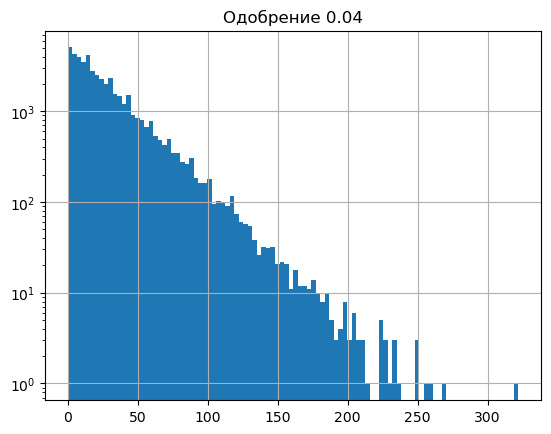

In [61]:
DMC.set_index('CNTR_ID')[['NUM_IN_QUEUE']].hist(bins=100)
plt.title('Одобрение %0.2f' % (1/DMC['NUM_IN_QUEUE'].mean()))
plt.yscale('log')
plt.show()

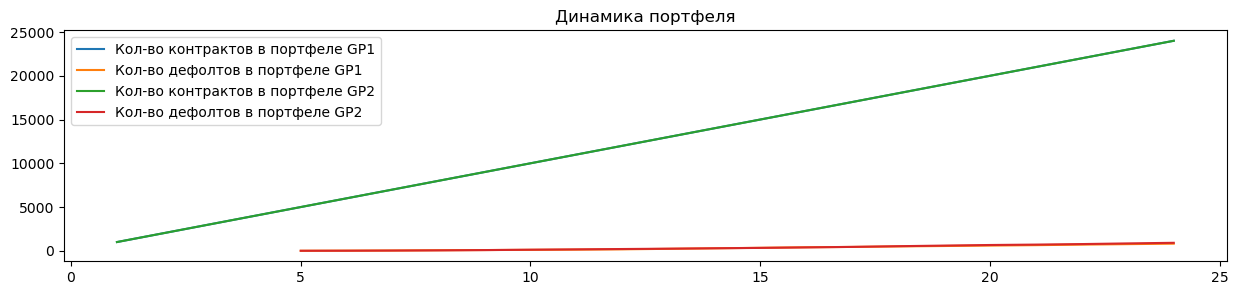

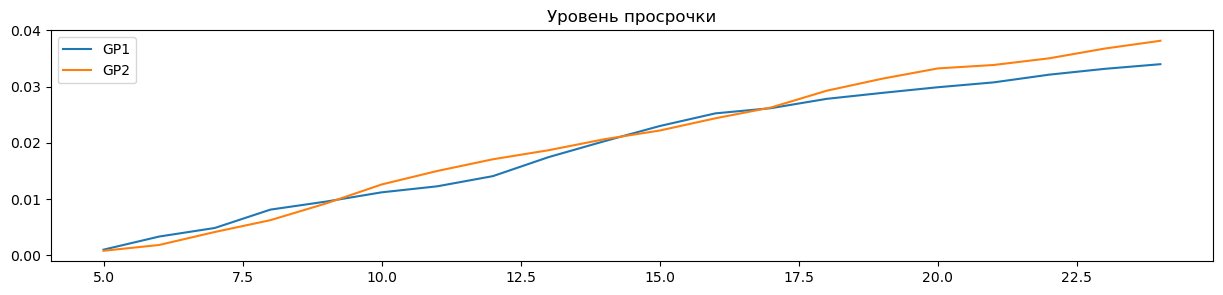

In [64]:
ix = ((LI['WRTOFF_ID'] == 0)&
      (LI['CLOSED_ID'] == 0)
     )
ix_bad = LI['BADFLAG'] == 1
ix_gp1 = LI['PORTFOLIO_ID'] == 1
ix_gp2 = LI['PORTFOLIO_ID'] == 2

plt.figure(figsize=[15,3])

T1 = LI[ix_gp1&ix].groupby('SD')[['CNTR_ID']].count()
B1 = LI[ix_gp1&ix&ix_bad].groupby('SD')[['CNTR_ID']].count()
plt.plot(T1)
plt.plot(B1)

T2 = LI[ix_gp2&ix].groupby('SD')[['CNTR_ID']].count()
B2 = LI[ix_gp2&ix&ix_bad].groupby('SD')[['CNTR_ID']].count()
plt.plot(T2)
plt.plot(B2)


plt.title('Динамика портфеля')
plt.legend(['Кол-во контрактов в портфеле GP1', 'Кол-во дефолтов в портфеле GP1',
            'Кол-во контрактов в портфеле GP2', 'Кол-во дефолтов в портфеле GP2',
           ])
plt.show()

plt.figure(figsize=[15,3])
plt.plot(B1/T1)
plt.plot(B2/T2)
plt.title('Уровень просрочки')
plt.legend(['GP1', 'GP2'])
plt.show()

In [67]:
col_on = ['PORTFOLIO_ID', 'CNTR_ID']
col_dmc = ['MODEL_SCORE', 'FATED_SCORE'] + col_on
ix = LI['MOB'] == 12
T = LI[ix_gp1&ix].merge(DMC[col_dmc], on = col_on, how = 'left')

In [69]:
sd_list = T['SD'].unique()
dic_stat = {}
for sd in sd_list:
    ix = T['SD'] == sd
    dic_stat[sd-12] = [DS.gini(T[ix], target = 'BADFLAG', score = 'MODEL_SCORE'),
                       T[ix]['BADFLAG'].mean()
                      ]   

In [71]:
D_stat = pd.DataFrame.from_dict(dic_stat, orient = 'index', columns=['GINI', 'DR'])

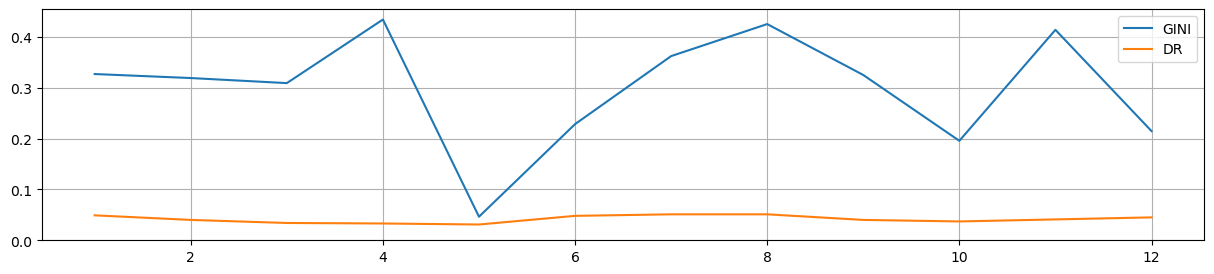

In [73]:

plt.figure(figsize=[15,3])
plt.plot(D_stat)
plt.ylim([0,None])
plt.legend(D_stat.columns)
plt.grid()
plt.show()

In [85]:
ix = T['SD'].between(12, 24)
TT = T[ix][['FATED_SCORE', 'BADFLAG']]
TT

,FATED_SCORE,BADFLAG
0,-2.060141,0
1,-2.434838,0
2,-1.627438,0
3,-2.793085,0
4,-1.044589,0
...,...,...
11995,-2.302774,0
11996,-1.539607,0
11997,-2.654530,0
11998,-2.081976,0


In [87]:
y_gini = 0.60

In [89]:
model2 = DS.create_model(gini = y_gini, tto_sample=TT)
model2.info()

3 0 0.645


In [91]:
model2.log_dic['root_scalar']

      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: 0.6496800824232175
         method: brentq

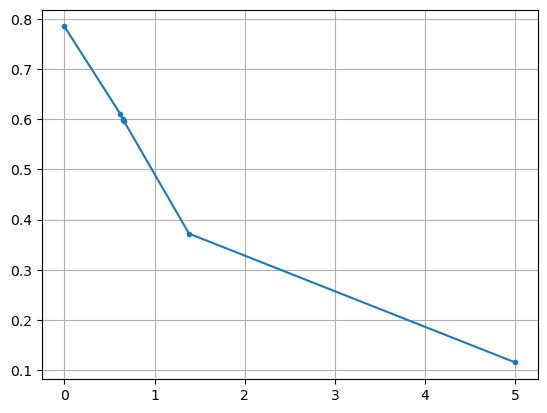

In [93]:
dic_fun = model2.log_dic['dic_fun']
x = list(dic_fun.keys())
x.sort()
y = [dic_fun[k] for k in x]
plt.plot(x, y, '.-')
plt.grid()

In [97]:
TT['MODEL_SCORE'] = model2.Score(np.array(TT['FATED_SCORE'].values))

In [99]:
DS.calibration(model = model2, sample = TT)

(-1.2840030151825241, 1.397361248162169)

In [103]:
model2.log_dic

{'root_scalar':       converged: True
            flag: converged
  function_calls: 7
      iterations: 6
            root: 0.6496800824232175
          method: brentq,
 'dic_fun': {0.0: 0.7852260869565217,
  5.0: 0.11492601391304348,
  1.382: 0.3719909495652175,
  0.619: 0.6110157182608695,
  0.657: 0.597466424347826,
  0.65: 0.5996329669565218,
  0.645: 0.6007647060869565},
 'LR': LogisticRegression(random_state=42)}

In [107]:
Model.model_dic[2]

{1: <DS_risk.Model at 0x7963182c3440>,
 2: <DS_risk.Model at 0x79631404fec0>,
 3: <DS_risk.Model at 0x79631406a420>}

In [121]:
TT['PD'] = model2.PD(TT['MODEL_SCORE'])

In [123]:
TT['PD'].mean(), TT['BADFLAG'].mean()

(0.041650941820807905, 0.041666666666666664)

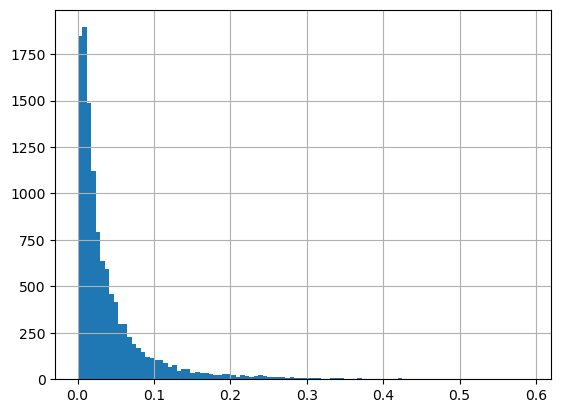

In [127]:
TT['PD'].hist(bins=100)
plt.show()

In [129]:
TT['GRADE'] =  TT['PD'].apply(lambda x: DS.grade(x))

In [131]:
TT_GR = TT.groupby('GRADE')[['BADFLAG', 'PD']].mean().rename(columns = {'BADFLAG': 'DR', 'PD': 'PD_MEAN'})

In [133]:
TT_GR['PD_MEDIAN'] = TT.groupby('GRADE')[['PD']].median()

In [135]:
TT_GR['CNT'] = TT.groupby('GRADE')[['BADFLAG']].count()

In [137]:
TT_GR

,DR,PD_MEAN,PD_MEDIAN,CNT
GRADE,,,,
1,0.006039,0.003292,0.003377,1656
2,0.006313,0.006648,0.006643,792
3,0.010669,0.009377,0.009390,1031
4,0.010244,0.013259,0.013233,1269
5,0.013189,0.018694,0.018595,1289
6,0.033489,0.026212,0.025903,1284
7,0.032993,0.037320,0.037131,1273
8,0.042190,0.052468,0.052001,1114
9,0.079677,0.073753,0.072790,866


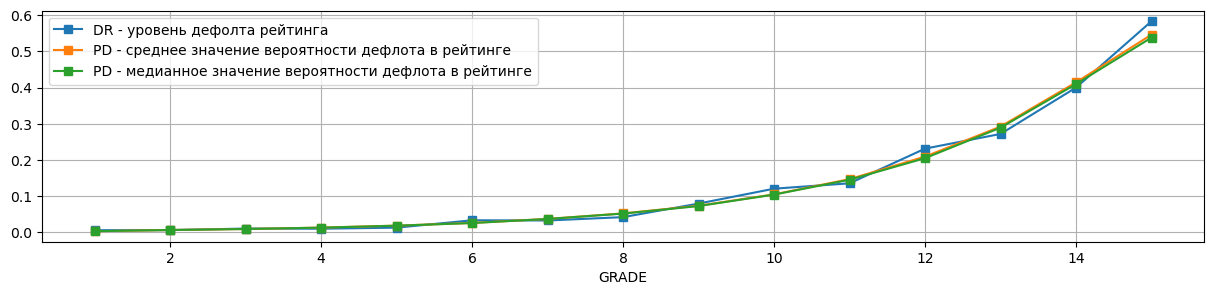

In [139]:
TT_GR[['DR', 'PD_MEAN', 'PD_MEDIAN']].plot(figsize=[15,3], marker = 's')
plt.grid()
plt.legend(['DR - уровень дефолта рейтинга',
            'PD - среднее значение вероятности дефлота в рейтинге',
            'PD - медианное значение вероятности дефлота в рейтинге'])

In [142]:
pd_cutoff

0.1

In [144]:
for t in range(1*12):
    GP1.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model0)
    GP2.next_month(issue_plan_gp, pd_cutoff = pd_cutoff, model = model2)

DWH.update_dwh_dic() # обновим справочники DWH
GP1.info()
GP2.info()

ID = 1 Возраст портеля 36 мес Кол-во контрактов 30878
ID = 2 Возраст портеля 36 мес Кол-во контрактов 30921


In [147]:
LI = DWH.LI.reset_index(drop=True)
print(LI.shape)
LI.tail()

(1271454, 7)


,PORTFOLIO_ID,CNTR_ID,SD,DOD_ID,MOB,WRTOFF_ID,CLOSED_ID
1271449,2,71996,36,0,0,0,0
1271450,2,71997,36,0,0,0,0
1271451,2,71998,36,0,0,0,0
1271452,2,71999,36,0,0,0,0
1271453,2,72000,36,0,0,0,0


In [149]:
ix_bad = LI['DOD_ID']>=4
LI['BADFLAG'] = 0
LI.loc[ix_bad,'BADFLAG'] = 1

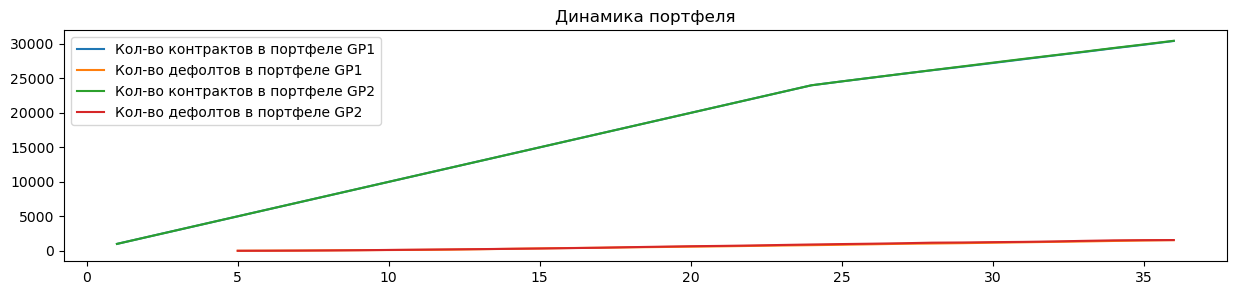

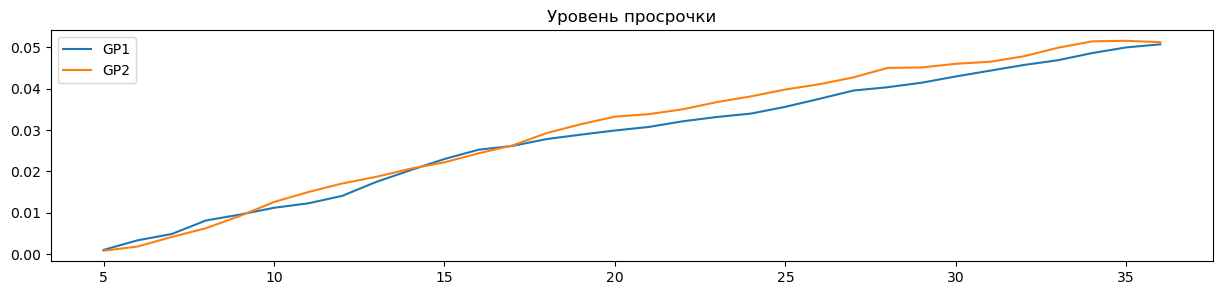

In [152]:
ix = ((LI['WRTOFF_ID'] == 0)&
      (LI['CLOSED_ID'] == 0)
     )
ix_bad = LI['BADFLAG'] == 1
ix_gp1 = LI['PORTFOLIO_ID'] == 1
ix_gp2 = LI['PORTFOLIO_ID'] == 2

plt.figure(figsize=[15,3])

T1 = LI[ix_gp1&ix].groupby('SD')[['CNTR_ID']].count()
B1 = LI[ix_gp1&ix&ix_bad].groupby('SD')[['CNTR_ID']].count()
plt.plot(T1)
plt.plot(B1)

T2 = LI[ix_gp2&ix].groupby('SD')[['CNTR_ID']].count()
B2 = LI[ix_gp2&ix&ix_bad].groupby('SD')[['CNTR_ID']].count()
plt.plot(T2)
plt.plot(B2)


plt.title('Динамика портфеля')
plt.legend(['Кол-во контрактов в портфеле GP1', 'Кол-во дефолтов в портфеле GP1',
            'Кол-во контрактов в портфеле GP2', 'Кол-во дефолтов в портфеле GP2',
           ])
plt.show()

plt.figure(figsize=[15,3])
plt.plot(B1/T1)
plt.plot(B2/T2)
plt.title('Уровень просрочки')
plt.legend(['GP1', 'GP2'])
plt.show()

In [156]:
for p in Portfolio.portfolio_dic:
    Portfolio.portfolio_dic[p].info()

ID = 1 Возраст портеля 36 мес Кол-во контрактов 30878
ID = 2 Возраст портеля 36 мес Кол-во контрактов 30921


### Калибровка на TTC

In [162]:
DR =  TT['BADFLAG'].mean()
CT = 1.2*DR
CT, DR

(0.049999999999999996, 0.041666666666666664)

In [164]:
w_defl = CT/DR
w_good = (1-CT)/(1-DR)
w_defl, w_good

(1.2, 0.9913043478260869)

In [168]:
from sklearn.linear_model import LogisticRegression
clf_ct = LogisticRegression(random_state=42)

In [170]:
sample_weight = [w_defl if t == 1 else w_good for t in TT['BADFLAG']]

In [174]:
x = TT[['MODEL_SCORE']]
y = TT['BADFLAG']

In [176]:
clf_ct.fit(X = x, y = y, sample_weight=sample_weight)

LogisticRegression(random_state=42)

In [178]:
A_CT = clf_ct.intercept_[0]
B_CT = clf_ct.coef_[0][0]
A_CT, B_CT

(-1.0918104053716045, 1.3986648639122392)

In [180]:
DS.calibration(model = Model.model_dic[2], sample = TT, CT = CT)

(-1.0918104053716045, 1.3986648639122392)

In [226]:
TT['PD_TTC'] = DS.sigmoid(A_CT + B_CT * TT['MODEL_SCORE'])

In [228]:
TT['PD_TTC'].mean(), TT['BADFLAG'].mean()

(0.053323393425779415, 0.04528925619834711)

<Axes: >

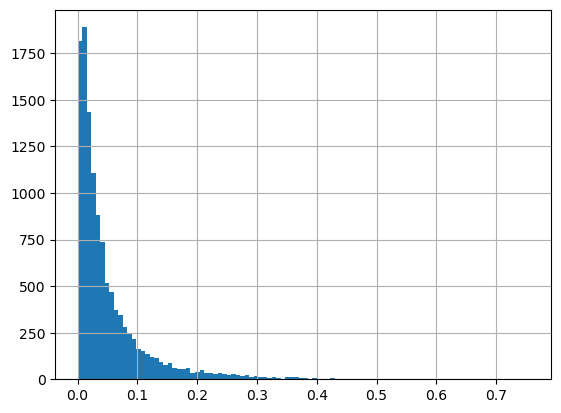

In [230]:
TT['PD_TTC'].hist(bins=100)

In [232]:
TT['BADFLAG_W'] = np.where(TT['BADFLAG'] == 1, w_defl, 0)

In [234]:
TT['BADFLAG_W'].mean() - CT

-6.938893903907228e-18

In [236]:
TT['SMPL_WEIGHT'] = np.where(TT['BADFLAG'] == 1, w_defl, w_good)
TT['PD_TTC_W'] = TT['PD_TTC'] * TT['SMPL_WEIGHT']

In [238]:
TT['SMPL_WEIGHT'].sum(), TT.shape[0]

(12099.999999999998, 12100)

In [240]:
assert abs(TT['BADFLAG_W'].mean() - CT) < 1e-4

In [242]:
assert abs(TT['PD_TTC_W'].mean() - CT) < 1e-4

In [244]:
TT['PD_TTC_W'].mean() - CT, TT['BADFLAG_W'].mean() - CT

(-6.556855539519013e-06, -6.938893903907228e-18)

In [247]:
TT['GRADE_TTC'] =  TT['PD_TTC'].apply(lambda x: DS.grade(x))

In [249]:
TT_GR_PIT = TT.groupby('GRADE')[['SMPL_WEIGHT', 'BADFLAG', 'BADFLAG_W', 'PD_TTC_W']].sum()

In [251]:
TT_GR_PIT['DR'] = TT_GR_PIT['BADFLAG_W']/TT_GR_PIT['SMPL_WEIGHT']

In [253]:
TT_GR_PIT['PD_TTC_W'] = TT_GR_PIT['PD_TTC_W']/TT_GR_PIT['SMPL_WEIGHT']

In [255]:
TT_GR_PIT

,SMPL_WEIGHT,BADFLAG,BADFLAG_W,PD_TTC_W,DR
GRADE,,,,,
1,1491.729986,19,22.8,0.003949,0.015284
2,768.179986,12,14.4,0.008105,0.018746
3,989.540166,19,22.8,0.011449,0.023041
4,1187.319321,8,9.6,0.016077,0.008085
5,1270.579294,13,15.6,0.022703,0.012278
6,1339.666967,26,31.2,0.031897,0.023289
7,1280.197507,40,48.0,0.044533,0.037494
8,1137.563712,40,48.0,0.063047,0.042195
9,946.888920,66,79.2,0.088108,0.083642


In [258]:
def weighted_median(DF, col_values, col_weight, col_group = None):
    ''' Вычисление медианы на выборке значений, которые имеют вес.
        col_values - значения, по которым вычисляется медиана
        col_weight - вес значения col_values
        col_group  - поле группировки, необязательное условие
    '''

    # Если поля групировки нет, то создадим фиктивное поле.
    if not col_group:
        col_group = '-'
        T = DF[[col_values, col_weight]].copy()
        T[col_group] = col_group
    else:
        T = DF[[col_values, col_weight, col_group]].copy()

    T.sort_values([col_group, col_values], inplace = True)
    T['cumsum'] = T.groupby(col_group)[col_weight].transform('cumsum')
    T['sum']    = T.groupby(col_group)[col_weight].transform('sum')
    ix = T['cumsum'] >= T['sum']/2.0
    T['vm'] = T[ix].groupby(col_group)[col_values].transform('min')

    return T.groupby(col_group)[['vm']].min().rename(columns = {'vm': 'midian'})
    


In [260]:
TT_GR_PIT['MEDIAN_W'] = weighted_median(TT, 'PD_TTC', 'SMPL_WEIGHT', 'GRADE')

In [262]:
TT_GR_PIT

,SMPL_WEIGHT,BADFLAG,BADFLAG_W,PD_TTC_W,DR,MEDIAN_W
GRADE,,,,,,
1,1491.729986,19,22.8,0.003949,0.015284,0.004015
2,768.179986,12,14.4,0.008105,0.018746,0.008064
3,989.540166,19,22.8,0.011449,0.023041,0.011407
4,1187.319321,8,9.6,0.016077,0.008085,0.016032
5,1270.579294,13,15.6,0.022703,0.012278,0.022713
6,1339.666967,26,31.2,0.031897,0.023289,0.031690
7,1280.197507,40,48.0,0.044533,0.037494,0.044138
8,1137.563712,40,48.0,0.063047,0.042195,0.062719
9,946.888920,66,79.2,0.088108,0.083642,0.087535


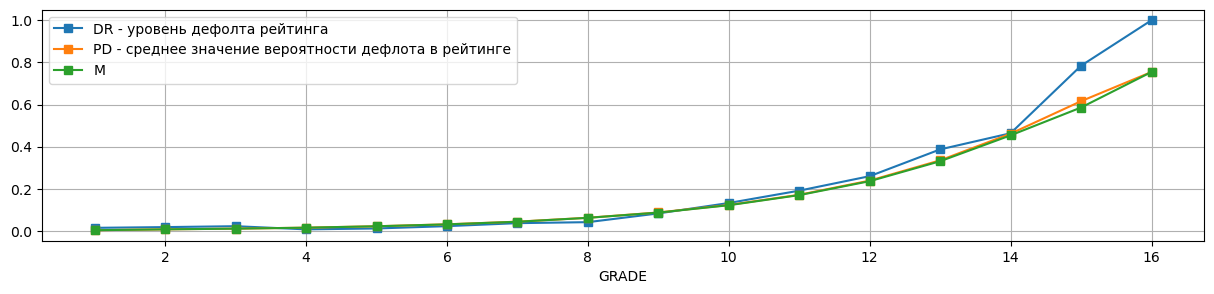

In [264]:
TT_GR_PIT[['DR', 'PD_TTC_W', 'MEDIAN_W']].plot(figsize=[15,3], marker = 's')
plt.grid()
plt.legend(['DR - уровень дефолта рейтинга', 'PD - среднее значение вероятности дефлота в рейтинге', 'M'])

In [266]:
weighted_median(TT, 'PD_TTC', 'SMPL_WEIGHT')

,midian
-,
-,0.029187


<Axes: xlabel='GRADE'>

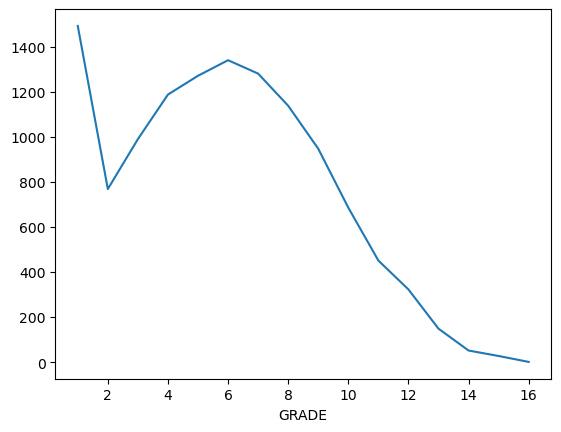

In [268]:
TT_GR_PIT['SMPL_WEIGHT'].plot()